In [8]:
from cmp import *
% matplotlib notebook
np.set_printoptions(threshold=np.nan)

<IPython.core.display.Javascript object>


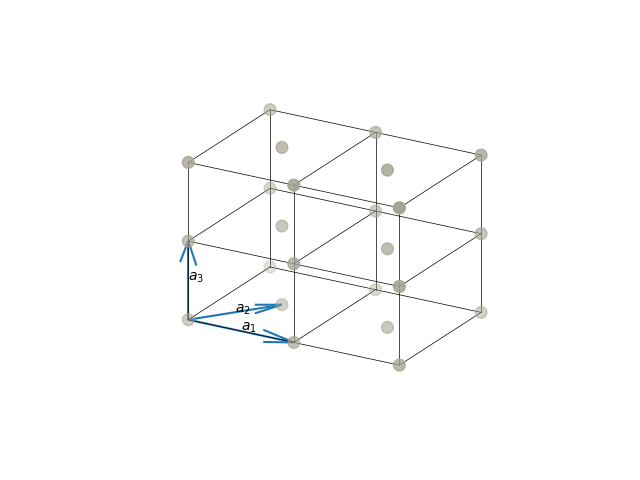

In [9]:
# Inputs
eq = np.isclose
# Lattice vectors (3 vectors of length 3)
a = 1
b = 2
a1 = np.array([1, 0, 0])
a2 = np.array([0, 1, 0])
a3 = np.array([0, 0, 1])
theta = 80*np.pi/180

# Array of basis vectors
basis = np.array([[0,0,0],[0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5]])
# Colors for each of the basis vectors
colors = ('xkcd:cement','b','b','b')
# Size multiplier for each of the atoms. Default is 1
sizes = (2,1,1,1)
verbose = True


# Gridline type:
# Soft: Lines along cartesian axes. Takes into account nonequal lattice spacing
# LatticeVectors: Lines along the latticevectors (only on lattice points)
GridType = "lattice"

# Limit type:
# individual: Sets the limits as max(nx*a1,ny*a2,nz*a3), so we include nx unitcells in the a1 direction, etc.
# sum: Sets the limits r_min = n_min*[a1 a2 a3] and likewise for n_max
LimType = "dynamic"
Maxs = [2,2,2]
Mins = [0,0,0]

LatticeType = "base centred cubic"
#LatticeCreator(a1,a2,a3,basis,colors,sizes,LimType,GridType,Mins,Maxs)
LatticeCreator(Lattice = LatticeType, verbose=False)

In [10]:
def LatticePlotter(a1, a2, a3, AtomicPositions, AtomicColors, AtomicSizes,
                   LatticePosition, LatticeCoefficients, n_max, GridType, r_min, r_max, verbose=False):
    """
    Takes the input lattice, adds gridlines and plots everything
    """
    # Create the figure
    fig = plt.figure()
    ax = fig.gca(projection="3d")

    # Plot atoms. For now a single size and color
    ax.scatter(AtomicPositions[:, 0], AtomicPositions[:, 1],
               AtomicPositions[:, 2], c=AtomicColors, s=AtomicSizes)

    # Get the relevant gridlines:
    g_col = 'k'
    g_w = 0.5
    pruned_lines = CreateLines(AtomicPositions[LatticePosition], a1, a2, a3, n_max, LatticeCoefficients[LatticePosition])
    for line in pruned_lines:
        ax.plot(line[0], line[1], line[2], color=g_col, linewidth=g_w)
    # plot lattice vectors
    ax.quiver(0, 0, 0, a1[0], a1[1], a1[2])
    ax.quiver(0, 0, 0, a2[0], a2[1], a2[2])
    ax.quiver(0, 0, 0, a3[0], a3[1], a3[2])
    ax.text(a1[0] / 2, a1[1] / 2, a1[2] / 2, '$a_1$')
    ax.text(a2[0] / 2, a2[1] / 2, a2[2] / 2, '$a_2$')
    ax.text(a3[0] / 2, a3[1] / 2, a3[2] / 2, '$a_3$')

    # Set limits, orthographic projection (so we get the beautiful hexagons),
    # no automatic gridlines, and no axes
    ax.set_aspect('equal')
    ax.set_proj_type('ortho')
    ax.set_xlim3d([r_min[0], r_max[0]])
    ax.set_ylim3d([r_min[1], r_max[1]])
    ax.set_zlim3d([r_min[2], r_max[2]])
    ax.grid(False)
    plt.axis('equal')
    plt.axis('off')

    # make the panes transparent (the plot box)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    plt.show()


In [30]:
(a1,a2,a3), basis = LatticeChooser("bcc")
print(a1,a2,a3,basis)
r_min,r_max,n_min,n_max = FindLimits("sum",a1,a2,a3)
colors = ["xkcd:cement"]
sizes = [2]
N_basis = 1
(AtomicPositions, LatticeCoefficients, AtomicColors, AtomicSizes,
     LatticePosition) = LatticeGenerator(a1, a2, a3, basis, colors, sizes,
                                         LimType, n_min, n_max, r_min, r_max,
                                         N_basis)

[1. 0. 0.] [0. 1. 0.] [0.5 0.5 0.5] [0. 0. 0.]


In [36]:
def CreateLines(points, v1, v2, v3, n_max, coefficients):
    """
    Creates lines along vectors and limits these to the given plot box
    """
    
    # Some observations: We want to create gridlines on every lattice point, along the lattice vectors. But we want to limit the lines, so they stay within the plot-box.
    # For each point, we could just create a line from p to p+(n_max-coefficients)*lattice
    lattice = np.array([v1, v2, v3])
    lines = []

    # Create all gridlines needed and append them to the lines-list
    numPoints = np.shape(points)[0]
    for rowID in range(numPoints):
        CurrentPoint = points[rowID, ]
        StartPoint = CurrentPoint
        print("coefficients: {}".format(n_max-coefficients[rowID,]))
        EndPoint = StartPoint + lattice.T @ (n_max - coefficients[rowID,])
        print("starting point: {}".format(StartPoint))
        print("ending point: {}".format(EndPoint))
        lines.append(np.array((StartPoint,EndPoint)).T)

    # run through each line and clip points outside limits
    #pruned_lines = []
    #for point in lines:
    #    for line in point:
    #        # Get the points outside the plot and delete them
    #        rows = Limiter(line, r_min, r_max)
    #        line = np.delete(line, rows, 0)

    #        # Because we're working with arrays we're passing copies, we need
    #        # to append the pruned lines to a new list. And let's only add
    #        # them if there are actually any points to plot
    #        line_length, _ = np.shape(line)
    #        if line_length > 0:
    #            pruned_lines.append(line)
    print("It'sa me, Mario!")
    return lines

<IPython.core.display.Javascript object>


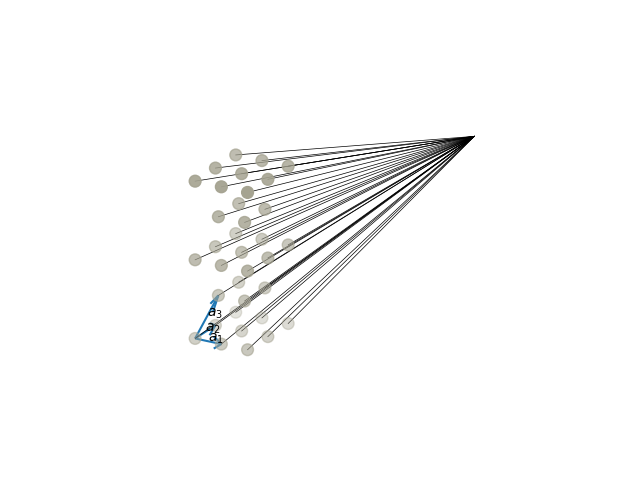

coefficients: [6. 6. 0.]
starting point: [0. 0. 2.]
ending point: [6. 6. 2.]
coefficients: [6. 5. 0.]
starting point: [0. 1. 2.]
ending point: [6. 6. 2.]
coefficients: [6. 4. 0.]
starting point: [0. 2. 2.]
ending point: [6. 6. 2.]
coefficients: [5. 6. 0.]
starting point: [1. 0. 2.]
ending point: [6. 6. 2.]
coefficients: [5. 5. 2.]
starting point: [0. 0. 1.]
ending point: [6. 6. 2.]
coefficients: [5. 5. 1.]
starting point: [0.5 0.5 1.5]
ending point: [6. 6. 2.]
coefficients: [5. 5. 0.]
starting point: [1. 1. 2.]
ending point: [6. 6. 2.]
coefficients: [5. 4. 2.]
starting point: [0. 1. 1.]
ending point: [6. 6. 2.]
coefficients: [5. 4. 1.]
starting point: [0.5 1.5 1.5]
ending point: [6. 6. 2.]
coefficients: [5. 4. 0.]
starting point: [1. 2. 2.]
ending point: [6. 6. 2.]
coefficients: [5. 3. 2.]
starting point: [0. 2. 1.]
ending point: [6. 6. 2.]
coefficients: [4. 6. 0.]
starting point: [2. 0. 2.]
ending point: [6. 6. 2.]
coefficients: [4. 5. 2.]
starting point: [1. 0. 1.]
ending point: [6. 

In [37]:
LatticePlotter(a1, a2, a3, AtomicPositions, AtomicColors, AtomicSizes,
                   LatticePosition, LatticeCoefficients, n_max, "lattice", r_min, r_max)

In [27]:
point=a1+a2+a3
coefficient=np.array([1,1,1])
endpoint = np.array([a1,a2,a3]).T @ (n_max-coefficient)
print(endpoint)
print(point)

[4.5 4.5 1.5]
[1.5 1.5 0.5]
